In [51]:
from matplotlib import pyplot as plt
import re
import math

In [55]:
def split_by_epoch(output):
    s = output.split('===')
    s = [e for e in s if '(train)' in e]
    return s

def get_numbers(s):
    return [float(x) for x in re.findall("\d+\.\d+", s)]

def get_accuracies(output):
    epochs = split_by_epoch(output)
    valid_accs = []
    for e in epochs:
        valid_accs.append(get_numbers(e)[-1])

    return valid_accs

def get_perplexities(output):
    epochs = split_by_epoch(output)
    pps = []
    for e in epochs:
        pps.append(math.exp(get_numbers(e)[-2]))

    return pps

def get_loss(output):
    epochs = split_by_epoch(output)
    pps = []
    for e in epochs:
        pps.append(get_numbers(e)[-2])

    return pps

def get_in_file(transformation_function, file_path):
    with open(file_path, 'r') as f:
        data=f.read()
        return transformation_function(data)

In [59]:
get_in_file(get_perplexities, '../output_files/spn_output.txt')[100]

11.803923780865576

In [58]:
math.exp(2.34597)

10.443397912015204

In [70]:
def plot(file):
    plt.plot(get_in_file(get_perplexities, file)[:100])

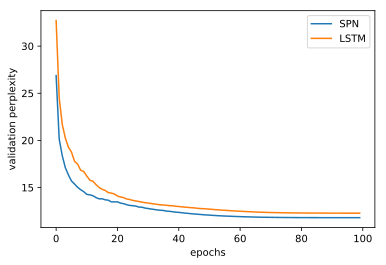

In [71]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline




plt.figure(dpi=500)
plot('../output_files/spn_output.txt', )
plot('../output_files/lstm_output.txt')
plt.ylabel('validation perplexity')
plt.xlabel('epochs')
plt.gca().legend(('SPN','LSTM'))
plt.savefig('spn_lstm_perf.png')